# Importando librerías

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Importando el dataset

In [2]:
filepath = '../Datasets_Proyecto3/dataset.csv'
dataset = pd.read_csv(filepath)
dataset

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,simple_toxic
0,5f140a8f41763bad,"""== A barnstar for you! ==\n\n The Minor barn...",0,0,0,0,0,0,0
1,c57b608d96f057f2,"""==Glenn Beck Hoax==\nThis topic should be del...",0,0,0,0,0,0,0
2,1d9867f0f60ba9bd,"""\n\n Date of establishment \n\nCharles MacKay...",0,0,0,0,0,0,0
3,17eb2a66bfce1023,==AfD nomination of Untitled Chilli Album== \n...,0,0,0,0,0,0,0
4,b8324615a1bcaf58,scum who look up to Che deserve the worst kind...,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...
22350,8c7dd2ac90e2930a,== Fucc whut they think!!!!! == \n\n Hey Torra...,1,0,1,0,1,0,1
22351,2405b14938eed8be,"""\n\n Time to reactivate the \n\nWell, it has...",0,0,0,0,0,0,0
22352,22088761aece5f38,"WMC, after reviewing the second part of this e...",0,0,0,0,0,0,0
22353,b73c2ec014274e02,== Dramatizations == \n\n The article mention...,0,0,0,0,0,0,0


### Establecer clasificación del texto.

In [3]:
def clean_text(text):
    return text.str.replace(r'\n', " ")

def set_class(dataset):
    dataset = dataset.copy() 
    dataset['bad'] = dataset[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)
    dataset['class'] = [1 if i else 0 for i in dataset['bad'] > 0]
    dataset['text'] = clean_text(dataset['comment_text'])
    return dataset[['text', 'class']]

In [4]:
new_dataset = dataset.pipe(set_class)
new_dataset

C:\Users\David Zacarias\AppData\Local\Temp\ipykernel_19876\2818078862.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  return text.str.replace(r'\n', " ")


,text,class
0,"""== A barnstar for you! == The Minor barnst...",0
1,"""==Glenn Beck Hoax== This topic should be dele...",0
2,""" Date of establishment Charles MacKay say...",0
3,==AfD nomination of Untitled Chilli Album== ...,0
4,scum who look up to Che deserve the worst kind...,1
...,...,...
22350,== Fucc whut they think!!!!! == Hey Torranc...,1
22351,""" Time to reactivate the Well, it has bee...",0
22352,"WMC, after reviewing the second part of this e...",0
22353,== Dramatizations == The article mentions ...,0


# Generar el conjunto de prueba

In [5]:
dataset_copy = new_dataset
y = dataset_copy["class"]
X = list(dataset_copy['text'])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
y_train

14508    1
12376    0
20628    1
6316     0
17243    0
        ..
16644    0
9907     0
7694     0
18070    0
21988    0
Name: class, Length: 17884, dtype: int64

# Explorar los datos para obtener ideas

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22355 entries, 0 to 22354
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             22355 non-null  object
 1   comment_text   22355 non-null  object
 2   toxic          22355 non-null  int64 
 3   severe_toxic   22355 non-null  int64 
 4   obscene        22355 non-null  int64 
 5   threat         22355 non-null  int64 
 6   insult         22355 non-null  int64 
 7   identity_hate  22355 non-null  int64 
 8   simple_toxic   22355 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.5+ MB


In [9]:
dataset.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,simple_toxic
count,22355.000000,22355.000000,22355.000000,22355.000000,22355.000000,22355.000000,22355.000000
mean,0.096131,0.009170,0.054484,0.003221,0.050369,0.009439,0.101096
std,0.294777,0.095323,0.226976,0.056662,0.218710,0.096695,0.301462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
dataset.shape

(22355, 9)

In [11]:
new_dataset["class"].value_counts()

0    20095
1     2260
Name: class, dtype: int64

### Correlación de los datos (Matriz de Correlación)

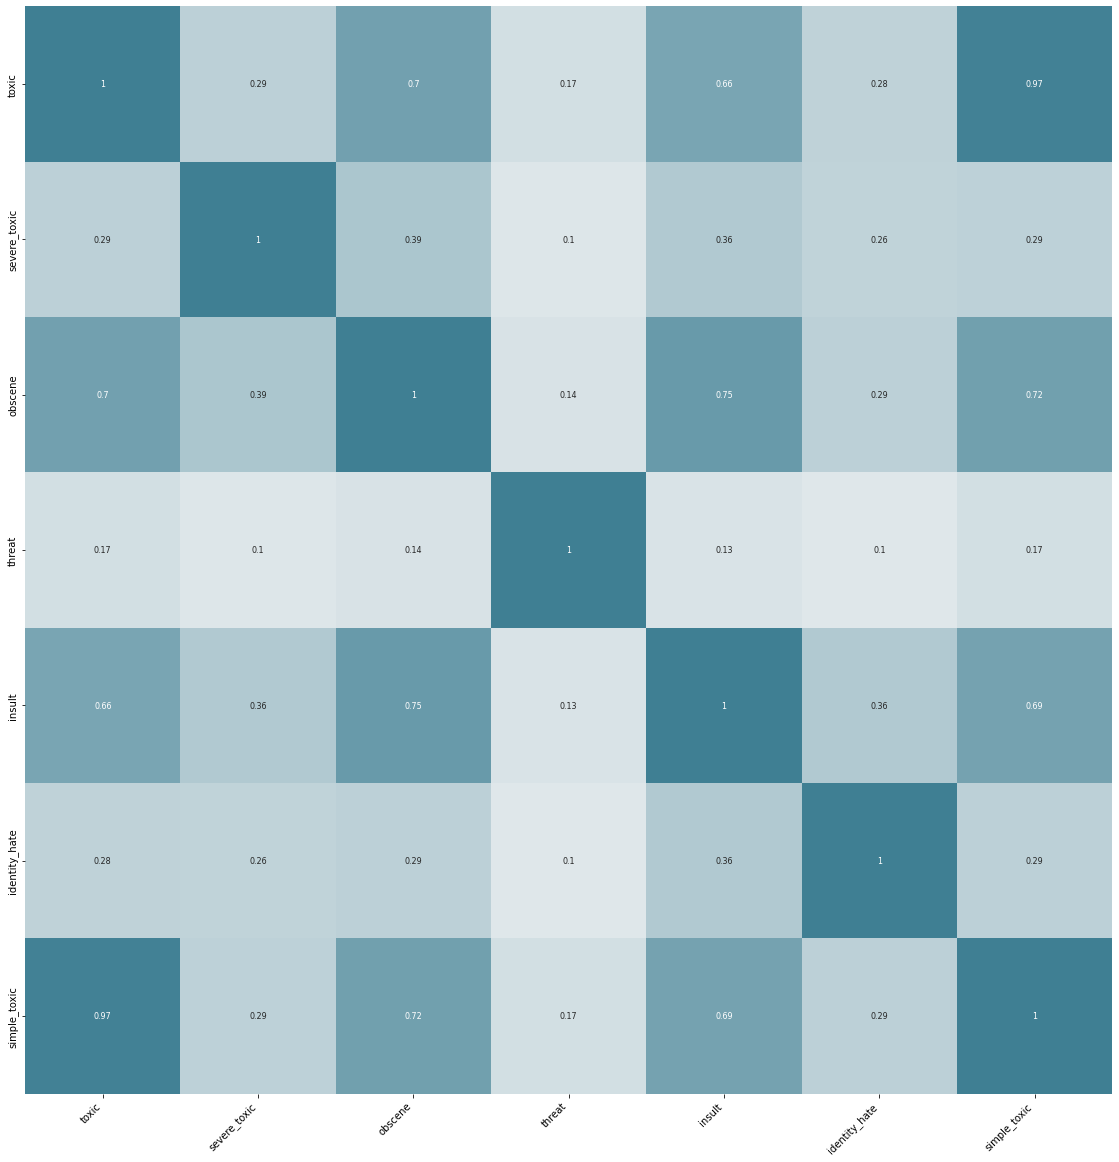

In [12]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 20))

sb.heatmap(
    corr_matrix,
    annot = True,
    cbar = False,
    annot_kws = {"size": 8},
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap = sb.diverging_palette(20, 220, n=200),
    square = True,
    ax = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Explorar modelos diferentes y preseleccionar los mejores.

In [13]:
accuracy, precision, recall = {}, {}, {}
models = {}
models['Logistic Regression'] = ''
models['K-Nearest Neighbor'] = ''
models['SVC'] = ''
models['SVC Kernel'] = ''
models['Decision Trees'] = ''
models['Random Forest'] = ''

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 0, class_weight="balanced")

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

model_log_reg = Pipeline([
    ("lang", CountVectorizer()),
    ("log_reg", log_reg)
])
model_log_reg.fit(list(X_train), y_train)

c:\Users\David Zacarias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('lang', CountVectorizer()),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [16]:
y_pred = model_log_reg.predict(X_test)

print("Predicción (Logistic Regression):", y_pred)

Predicción (Logistic Regression): [0 0 0 ... 0 0 0]


In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3872  169]
 [ 114  316]]


In [18]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  316
False Positive(FP) =  169
True Negative(TN)  =  3872
False Negative(FN) =  114


In [19]:
accuracy['Logistic Regression'] = accuracy_score(y_test, y_pred)
print(accuracy['Logistic Regression'])

0.936703198389622


In [20]:
precision['Logistic Regression'] = precision_score(y_test, y_pred)
print(precision['Logistic Regression'])

0.6515463917525773


In [21]:
recall['Logistic Regression'] = recall_score(y_test, y_pred)
print(recall['Logistic Regression'])

0.7348837209302326


### K-NN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [23]:
model_knn = Pipeline([
    ("lang", CountVectorizer()),
    ("knn", knn)
])
model_knn.fit(list(X_train), y_train)

Pipeline(steps=[('lang', CountVectorizer()), ('knn', KNeighborsClassifier())])

In [24]:
y_pred = model_knn.predict(X_test)

print("Predicción (K-Nearest Neighbor):", y_pred)

Predicción (K-Nearest Neighbor): [0 0 0 ... 0 0 0]


In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3905  136]
 [ 298  132]]


In [26]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  132
False Positive(FP) =  136
True Negative(TN)  =  3905
False Negative(FN) =  298


In [27]:
accuracy['K-Nearest Neighbor'] = accuracy_score(y_test, y_pred)
print(accuracy['K-Nearest Neighbor'])

0.9029299932900917


In [28]:
precision['K-Nearest Neighbor'] = precision_score(y_test, y_pred)
print(precision['K-Nearest Neighbor'])

0.4925373134328358


In [29]:
recall['K-Nearest Neighbor'] = recall_score(y_test, y_pred)
print(recall['K-Nearest Neighbor'])

0.30697674418604654


### SVC

In [30]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', random_state = 0, probability=True, class_weight="balanced")

In [31]:
model_svc = Pipeline([
    ("lang", CountVectorizer()),
    ("svc", svc)
])
model_svc.fit(list(X_train), y_train)

Pipeline(steps=[('lang', CountVectorizer()),
                ('svc',
                 SVC(class_weight='balanced', kernel='linear', probability=True,
                     random_state=0))])

In [32]:
y_pred = model_svc.predict(X_test)

print("Predicción (SVC):", y_pred)

Predicción (SVC): [0 0 0 ... 0 0 0]


In [33]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3862  179]
 [ 141  289]]


In [34]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  289
False Positive(FP) =  179
True Negative(TN)  =  3862
False Negative(FN) =  141


In [35]:
accuracy['SVC'] = accuracy_score(y_test, y_pred)
print(accuracy['SVC'])

0.9284276448221874


In [36]:
precision['SVC'] = precision_score(y_test, y_pred,zero_division=0)
print(precision['SVC'])

0.6175213675213675


In [37]:
recall['SVC'] = recall_score(y_test, y_pred)
print(precision['SVC'])

0.6175213675213675


### SVC Kernel

In [38]:
svc_kernel = SVC(kernel = 'rbf', random_state = 0, probability=True, class_weight="balanced")

In [39]:
model_svc_kernel = Pipeline([
    ("lang", CountVectorizer()),
    ("svc_kernel", svc_kernel)
])
model_svc_kernel.fit(list(X_train), y_train)

Pipeline(steps=[('lang', CountVectorizer()),
                ('svc_kernel',
                 SVC(class_weight='balanced', probability=True,
                     random_state=0))])

In [40]:
y_pred = model_svc_kernel.predict(X_test)

print("Predicción (SVC Kernel):", y_pred)

Predicción (SVC Kernel): [0 0 0 ... 0 0 0]


In [41]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3205  836]
 [  80  350]]


In [42]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  350
False Positive(FP) =  836
True Negative(TN)  =  3205
False Negative(FN) =  80


In [43]:
accuracy['SVC Kernel'] = accuracy_score(y_test, y_pred)
print(accuracy['SVC Kernel'])

0.7951241333035115


In [44]:
precision['SVC Kernel'] = precision_score(y_test, y_pred,zero_division=0)
print(precision['SVC Kernel'])

0.2951096121416526


In [45]:
recall['SVC Kernel'] = recall_score(y_test, y_pred)
print(recall['SVC Kernel'])

0.813953488372093


### Decision Tree Classification

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, class_weight="balanced")

In [47]:
model_tree = Pipeline([
    ("lang", CountVectorizer()),
    ("tree", tree)
])
model_tree.fit(list(X_train), y_train)

Pipeline(steps=[('lang', CountVectorizer()),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', random_state=0))])

In [48]:
y_pred = model_tree.predict(X_test)

print("Predicción (Decision Tree Classification):", y_pred)

Predicción (Decision Tree Classification): [0 0 0 ... 0 0 0]


In [49]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3732  309]
 [ 191  239]]


In [50]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  239
False Positive(FP) =  309
True Negative(TN)  =  3732
False Negative(FN) =  191


In [51]:
accuracy['Decision Trees'] = accuracy_score(y_test, y_pred)
print(accuracy['Decision Trees'])

0.8881681950346678


In [52]:
precision['Decision Trees'] =precision_score(y_test, y_pred)
print(precision['Decision Trees'])

0.43613138686131386


In [53]:
recall['Decision Trees'] =recall_score(y_test, y_pred)
print(recall['Decision Trees'])

0.5558139534883721


### Random Forest Classification

In [54]:
from sklearn.ensemble import RandomForestClassifier
rnd_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, class_weight="balanced")

In [55]:
model_rnd_forest = Pipeline([
    ("lang", CountVectorizer()),
    ("rnd_forest", rnd_forest)
])
model_rnd_forest.fit(list(X_train), y_train)

Pipeline(steps=[('lang', CountVectorizer()),
                ('rnd_forest',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', n_estimators=10,
                                        random_state=0))])

In [56]:
y_pred = model_rnd_forest.predict(X_test)

print("Predicción (Random Forest Classification):", y_pred)

Predicción (Random Forest Classification): [0 0 0 ... 0 0 0]


In [57]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3968   73]
 [ 318  112]]


In [58]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  112
False Positive(FP) =  73
True Negative(TN)  =  3968
False Negative(FN) =  318


In [59]:
accuracy['Random Forest'] =accuracy_score(y_test, y_pred)
print(accuracy['Random Forest'])

0.9125475285171103


In [60]:
precision['Random Forest'] =precision_score(y_test, y_pred)
print(precision['Random Forest'])

0.6054054054054054


In [61]:
recall['Random Forest'] =recall_score(y_test, y_pred)
print(recall['Random Forest'])

0.26046511627906976


### Resumen

In [62]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.936703,0.651546,0.734884
K-Nearest Neighbor,0.902930,0.492537,0.306977
SVC,0.928428,0.617521,0.672093
SVC Kernel,0.795124,0.295110,0.813953
Decision Trees,0.888168,0.436131,0.555814
Random Forest,0.912548,0.605405,0.260465


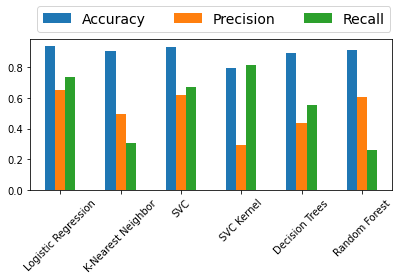

In [63]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()